# Adaptive PDE discretizations on cartesian grids
## Volume : Non-divergence form PDEs
## Part : Time dependent optimal control
## Chapter : Boat routing, with a generic cost

In this notebook, we compute the optimal costs an paths for a time-dependent optimal control problem, by numerically solving the corresponding (first order time dependent) Hamilton-Jacobi-Bellman (HJB) Partial Differential Equation (PDE). The intended application is to find the optimal route for a boat, whose instantaneous fuel consumption is tabulated and depends on the weather conditions, which are known in advance over the domain. The objective is to minimize the overall fuel consumption over the trajectory, for a window of arrival times. 

**Fuel consumption model.**
Let $\Omega$ denote the physical domain, and $\gamma : [0,T] \to \Omega$ a trajectory. The corresponding cost, or fuel consumption in the intended application, is defined as 
$$
    C(\gamma) :=  C_0(\gamma(0)) + \int_0^T c(t,\gamma(t),\gamma'(t)) dt.
$$
This fuel consumption $C(\gamma)$ depends on two parameter functions: 
* The *instantaneous fuel consumption* $c(t,x,v)$ for a vehicle moving at velocity $v$, at position $x\in \Omega$, and at the time $t$. In practice, this cost is often of the form $c(t,x,v) = c(m(t,x),v)$, where $m(t,x)$ gathers the geographical and meteorological conditions at $(t,x)$, and $c(m,v)$ is a tabulated cost. 
* The *initial time penalty* $C_0(x)$, for a vehicle starting from the position $x\in \Omega$ at time $t=0$. In applications, one often has $C_0(x_0) = 0$ for some specific position $x_0$, and $C_0(x) = \infty$ for all $x\neq x_0$. However, both the theoretical treatment and the numerical implementation face difficulties with infinite and/or discontinuous value functions. Fortunately, one can show that $C_0(x) := K \|x-x_0\|$ yields the same value function as the former discontinuous initial condition, for sufficiently large $K$, at suitable times $t$ and positions $x$, and under suitable assumptions. This approach is known as exact penalization.


Our objective is to compute the minimial fuel consumption needed to reach a position $x$ at time $t$, defined as 
$$
    C(t,x) := \min_{\gamma \in \Gamma_t^x} \mathcal C(\gamma),
$$
where $\Gamma_t^x$ collects all paths $\gamma : [0,t] \to \Omega$ such that $\gamma(t)=x$.
Under mild assumptions, the fuel consumption $C(t,x)$ of the boat, needed to reach a point $x$ at time $t$, is the unique solution to the Hamilton-Jacobi-Bellman PDE, first order and time-dependent,
$$
    \partial_t C(t,x) + \sup_v \Big(<\nabla_x C(t,x),v> - c(t,x,v)\Big) = 0.
$$

Denote by $C(t,x)$ the above cost function, and by $v = V(t,x)$ the optimal velocity at $(t,x)$. 
Then, again under mild assumptions, the optimal path $\gamma : [0,T] \to \Omega$ for reaching a point $x$ at time $T$ is the obeys the ordinary differential equation
$$
    \gamma'(t) = V(t,\gamma(t)),
$$
which must solved in reverse time, from $t=T$ to $t=0$, with terminal condition $\gamma(T) = x$. This process is known as optimal path backtracking.


**Generic and specialized methods.**
The optimal control model described above, and the numerical described and implemented below, are very generic. Almost a textbook example. In particular the implementation does not involve Selling's tensor decomposition, or related lattice basis reduction tools, which play a central role in most of the other notebooks of this repository. If further assumptions are introduced in the model, then the numerical cost can be reduced by several orders of magnitude. Consider for instance the following special cases:
* *Quadratic cost function.*  Assume that the instantaneous fuel consumption is quadratic, namely $c(t,x,v) = \mu(t,x) + \frac 1 2 \|v-\omega(t,c)\|^2_{M(t,x)}$, where $\mu$ is the consumption at rest, $\omega$ is a drift, and $M$ is a positive definite matrix encoding for instance the earth geometry. Then the HJB equation can be simplified, eliminating the supremum over $v$, and efficiently discretized as described in [this other notebook](BoatRouting_Time.ipynb). In contrast, where here explicitly compute a supremum over approximately $500$ distinct tabulated velocities $(v_i)_{i=1}^I$, which incurs a significant overhead in terms of time and memory usage.

* *Time independent cost function.* Assume that the instantaneous fuel consumption is independent of time, namely $c(t,x,v) = c(x,v)$. Then, under mild assumptions, the minimal cost $C(x) = \min_{t>0} \alpha t + C(t,x)$, where $\alpha>0$ is an arbitrary penalization of traveltime, obeys a time independent HJB equation. Following this approach results in a tremendous reduction in computation time and memory usage, as discussed in [this other notebook](../Notebooks_FMM/BoatRouting.ipynb).

**Convexity of the cost function.**
Consider a cost function $c(v) = c(t,x,v) : R^d \to R \cup \{+\infty\}$, where the state variables $t$ and $x$ have been fixed. Let also $\tilde c$ denote the lower convex envelope of $c$, defined as the largest convex function which is bounded above by $c$. Then, under mild assumptions, $\tilde c$ and $c$ yield the same value functions $C$ and $\tilde C$ for the overall trajectory cost. Indeed, the HJB PDE characterizing $C$ can be written in terms of the Legendre-Fenchel transform
$$
    c^*(t,x,w) := \sup_v  <w,v> - c(t,x,v),
$$
which is the same for $c$ and $\tilde c$. 

An upside of this observation is that costs defined for *finitely many velocities*, for instance tabulated velocities $(v_i)_{i=1}^I$, are handled in a reasonable manner. The PDE solution is the same as for the convex envelope $\tilde c$, which is a natural piecewise linear interpolant of the values $c(t,x,v_i)$, $1 \leq i \leq I$.

A downside of this observation is that a number of vehicles do involve non-convex costs, for instance sail boats, and they are therefore not appropriately described by this simple optimal control model. More complex models, involving a state $\Theta$ of the vehicle in addition to time $t$ and position $x$, and transitions between different states with appropriate costs, are needed to properly reflect this behavior. The value function thus depends on an additional variable $C = C(t,x,\theta)$, and the numerical cost is tightly connected to the number of discretization points $(\theta_k)_{k=1}^K$ used to discretize $\Theta$.
Examples of additional state variables include:
* The orientation $\theta\in S^1$ of the vehicle. In practice, numerical implementations often use from $K=60$ to $K=200$ orientations. This approach  is therefore quite costly numerically, but is becomes reasonable on the other hand the time dependency can be eliminated. See the notebooks on [curve penalization](../Notebooks_FMM/Curvature.ipynb) possibly [with a drift](../Notebooks_FMM/DubinsZermelo.ipynb).
* Two states, corresponding to the side of the boat sail. Or a few states, in a similar fashion. In that case the time dependent approach can be preserved.

[**Summary**](Summary.ipynb) of volume Non-Divergence form PDEs, this series of notebooks.

[**Main summary**](../Summary.ipynb) of the Adaptive Grid Discretizations 
	book of notebooks, including the other volumes.

# Table of contents
  * [1. The numerical scheme](#1.-The-numerical-scheme)
    * [1.1 Decomposition of the velocities](#1.1-Decomposition-of-the-velocities)
    * [1.2 Finite difference scheme](#1.2-Finite-difference-scheme)
    * [1.3 Efficient implementation of the linear operator](#1.3-Efficient-implementation-of-the-linear-operator)
  * [2. Quadratic cost](#2.-Quadratic-cost)
    * [2.1 Setting](#2.1-Setting)
    * [2.2 Computing the geodesic flow](#2.2-Computing-the-geodesic-flow)
    * [2.3 Backtracking the optimal paths](#2.3-Backtracking-the-optimal-paths)
    * [2.4 Optimization of memory usage](#2.4-Optimization-of-memory-usage)
  * [3. Data driven cost](#3.-Data-driven-cost)
    * [3.1 Interpolation of the costs](#3.1-Interpolation-of-the-costs)
    * [3.2 Discussion of the fuel consumption](#3.2-Discussion-of-the-fuel-consumption)
    * [3.3 Numerical solution](#3.3-Numerical-solution)
  * [4. Complex environment](#4.-Complex-environment)
    * [4.1 Validation on a quadratic and static test case](#4.1-Validation-on-a-quadratic-and-static-test-case)
    * [4.2 Time dependent, data driven cost](#4.2-Time-dependent,-data-driven-cost)



**Acknowledgement.** The experiments presented in these notebooks are part of ongoing research, 
some of it with PhD student Guillaume Bonnet, in co-direction with Frederic Bonnans.

Copyright Jean-Marie Mirebeau, University Paris-Sud, CNRS, University Paris-Saclay

## 0. Importing the required libraries.

In [1]:
import sys; sys.path.insert(0,"..") # Allow import of agd from parent directory (useless if conda package installed)
#from Miscellaneous import TocTools; print(TocTools.displayTOC('BoatRoutingGeneric_Time','NonDiv'))

In [2]:
from agd import AutomaticDifferentiation as ad
from agd import LinearParallel as lp
from agd import FiniteDifferences as fd
from agd.Interpolation import UniformGridInterpolation as interp
from agd.ODE.backtrack import RecurseRewind,odeint_array
from agd.Plotting import quiver
norm = ad.Optimization.norm
cupy_get = ad.cupy_generic.cupy_get # Transfer array from GPU to CPU

from agd.ExportedCode.Notebooks_FMM import BoatRouting
from agd.Eikonal import CenteredLinspace as clinspace

In [3]:
import numpy as np; xp=np 
from numpy import allclose,take_along_axis
from matplotlib import pyplot as plt
from scipy.interpolate import RegularGridInterpolator

Utilities

In [4]:
# Equivalently, with Python >= 3.8, from itertools import accumulate
from agd.ExportedCode.Notebooks_NonDiv.Time1D_NonDiv import accumulate 

In [5]:
def ReloadPackages():
    from Miscellaneous.rreload import rreload
    global RecurseRewind,odeint_array
    RecurseRewind,odeint_array = rreload([RecurseRewind,odeint_array],rootdir="../..")

### 0.1 Optional configuration

Uncomment the following line to use GPU acceleration

In [6]:
xp,plt,allclose,quiver = map(ad.cupy_friendly,(xp,plt,allclose,quiver))

Replacing numpy with cupy, set to output 32bit ints and floats by default.
Using cp.asarray(*,dtype=np.float32) as the default caster in ad.array.
Returning a copy of module matplotlib.pyplot whose functions accept cupy arrays as input.
Setting float32 compatible default values atol=rtol=1e-5 in np.allclose
Returning a copy of function quiver which accepts cupy arrays as input.


Choose between small or large instances using the following line. Computation time may become a bit longer.

In [7]:
large_instances = xp is not np # By default : large instances on GPU, small on CPU

## 1. The numerical scheme

We describe and implement the discretization of the time-dependent Hamilton-Jacobi-Bellman PDE obeyed by the cost function $C(t,x)$, here denoted $u(t,x)$ following the usual mathematical convention ($u$ is for unknown). Recall that $\partial_t u(t,x) + \sup_v ( <\nabla_x u(t,x),v> - c(t,x,v)) = 0$ is the original PDE.

We rely on a finite differences scheme, over a Cartesian discretization grid of scale $h>0$, written as
$$
    \frac {u(t+\delta t,x) - u(t,x)} {\delta t} 
    {+} \max_{1 \leq i \leq I} \Big( \sum_{1 \leq j \leq d}  \alpha_{ij} \frac {u(t,x)-u(t,x-h e_{ij})} h - c(t,x,v_i) \Big)= 0.
$$
We denoted by $(v_i)_{i=1}^I$ a finite set of velocities, whose corresponding fuel consumptions $c(t,x,v_i)$ are known.
The numerical scheme is first order, in time and space. It relies on a decomposition of the velocities of the form
$$
    v_i = \sum_{1 \leq j \leq d} \alpha_{ij} e_{ij},
$$
where $\alpha_{ij} \geq 0$ is a weight, and $e_{ij}$ is an offset with integer coordinates, for all $1 \leq i \leq I$ and all $1 \leq j \leq d$. 
The vectors $e_{ij} \in Z^2$ are chosen adaptively, among a four point or an eight point neighborhood of the origin. 


**Monotony, and stability.**
Denote by $i_*$, $1 \leq i_* \leq I$, the maximizer in the above numerical scheme. Then we can rewrite the update rule as 
$$
    u(t+\delta t,x) = 
    \Big(1-\frac {\delta t} h \sum_{1 \leq j \leq d} \alpha_{i_*j}\Big) \ u(t,x)
    {+} \frac {\delta t} h \sum_{1 \leq j \leq d}  \alpha_{i_*j} \ u(t,x-h e_i) + c(t,x, v_{i_*}).
$$

The scheme is monotone, subject to the Courant-Friedrichs-Levy (CFL) condition 
$$
\delta t \max_i \sum_j \alpha_{ij} \leq h.
$$
By monotony, one means that the value function $u(t+\delta t,x)$ is a non-decreasing function of the values $u(t,y)$ of the previous time step, where $x$ and $y$ belong to the discretization grid. This property implies comparison principles and stability properties which are of great help for the convergence analysis of the scheme. Higher order schemes are expected to lack the monotony property, and hence also the associated robustness properties.

For the four point stencil, one can simplify the CFL condition into $v_{\max}\delta t  \sqrt 2  \leq h$, and for the eight point stencil into $v_{\max}\delta t \leq h$, where $v_{\max} := \max_i \|v_i\|$ is the fastest considered velocity.


### 1.1 Decomposition of the velocities

We use upwind finite differences on a four point or an eight point stencil. (The latter is expected to be yield slight improvements in terms of numerical accuracy.)
For that purpose, the vectors must be decomposed, in the form
$$
    v = \alpha_0 e_0 + \alpha_1 e_1,
$$
where $e_0,e_1 \in \{-1,0,1\}^2$, and where $\alpha_0,\alpha_1 \geq 0$.

In [8]:
def decomp(v,four_point=False):
    v = ad.asarray(v)
    # Decomposition over the four point stencil
    shape = v.shape[1:]
    α = np.abs(v)
    e = (np.sign(v) * fd.as_field(xp.eye(2),shape,depth=2)).astype(int)
    if four_point: return α,e
    
    # Decomposition over the eight point stencil
    pos = α[0]<α[1]
    α[1][pos] -= α[0][pos]
    e[:,0][:,pos] += e[:,1][:,pos]
    
    pos = np.logical_not(pos)
    α[0][pos] -= α[1][pos]
    e[:,1][:,pos] += e[:,0][:,pos]
    return α,e

Let us check our decomposition.

In [9]:
θ = xp.linspace(0,2.*np.pi,endpoint=False)
v = ad.array([np.cos(θ),np.sin(θ)])
α,e = decomp(v)

assert np.all(α>=0) # Non-negative weights 
assert np.allclose(v,(α*e).sum(axis=1)) # Reconstruction

### 1.2 Finite difference scheme

The numerical scheme of interest, as well as the original PDE, involves a maximum over a family of affine functions. We decompose the implementation in two steps, a linear one, followed with a non-linear one.

In [10]:
def Scheme0(u,dx,velocity,four_point=False):
    """
    Linear part of the scheme.
    Approximates <du,velocity>, using degenerate elliptic finite differences.
    """
    α,e = decomp(velocity,four_point=four_point)
    du = fd.DiffUpwind(u,-e,dx) # (u(x-he)-u(x))/h
    α = fd.as_field(α,u.shape)
    return lp.dot_VV(α,-du)

In [11]:
def Scheme(u,dt,costs,scheme0=None,**kwargs):
    """One explicit step of the discretized HJB PDE"""
    u0 = Scheme0(u,**kwargs) if scheme0 is None else scheme0(u) 
    costs = fd.as_field(costs,u.shape)
    return u-dt*np.nanmax(u0-costs,axis=(0,1))

The CFL condition, ensuring the stability of the scheme, is discussed in the introduction of this section.

In [12]:
def CFL(velocity,h,four_point=False):
    """Largest time_step for which the scheme is stable."""
    α,_ = decomp(velocity,four_point)
    return dx/np.max(np.sum(α,axis=0))

We rely on exact penalization, see the introduction of this notebook, and for that purpose, the initial condition will be defined as
$$
    u_0(x) = K \|x-x_0\|
$$
where $x_0$ is the source point, and where $K$ is sufficiently large. In contrast with the [quadratic scheme](BoatRouting_Time.ipynb), the CFL condition is independent of the Lipschitz constant $K$ in this case.

### 1.3 Efficient implementation of the linear operator

We can improve computation time by saving the structure of the sparse linear operator involved in the definition of our numerical scheme.

<!---
#    op_ad.simplify_ad() # Surprisingly decreases efficiency (More random pattern of accesses ?)
#    return lambda u: op_ad.as_func(u.reshape(-1)) # Works but less efficient
--->

<!---
Attempt to reorder the variables in order to have a structure more local. Not effective.
def MakeScheme1(u,dx,*args,**kwargs):
    """Save the sparse linear structure of Scheme0"""
    u_ad = ad.Sparse.identity(constant=np.zeros_like(u))
    op_ad = Scheme0(u_ad,dx,*args,**kwargs)
    op_ad.coef[np.isnan(op_ad.value),:]=np.nan
    
    op_ad = np.moveaxis(op_ad,(0,1),(-2,-1))
    lin = op_ad.tangent_operator()
    shape = op_ad.shape
    
    return lambda u: np.moveaxis( (lin*u.reshape(-1)).reshape(shape), (-2,-1),(0,1))
--->

In [13]:
def MakeScheme0(u,*args,**kwargs):
    """Save the sparse linear structure of Scheme0"""
    u_ad = ad.Sparse.identity(constant=np.zeros_like(u))
    op_ad = Scheme0(u_ad,*args,**kwargs)
    op_ad.coef[np.isnan(op_ad.value),:]=np.nan
    lin = op_ad.tangent_operator()
    shape = op_ad.shape
    return lambda u: (lin*u.reshape(-1)).reshape(shape)

## 2. Quadratic cost

For consistency checking, we reproduce a fully synthetic experiment already presented in the notebooks on the [quadratic](BoatRouting_Time.ipynb) and [static](../Notebooks_FMM/BoatRouting.ipynb) variants of the problem of interest. This experiment features a quadratic cost function, thus of the form:
$$
    c(t,x,v) = \mu(t,x) + \frac 1 2 \|v-\omega(t,x)\|_{M(t,x)}^2.
$$
For further simplification, the parameters $\mu,\omega,M$ are chosen independent of time and space, and the domain is a square.

### 2.1 Setting


In [14]:
def quadratic_cost(model_params,velocity):
    """Cost associated to a given velocity in a quadratic cost model"""
    μ, ω, M, velocity = fd.common_field( (*model_params,velocity),depths = (0,1,2,1))
    return μ + 0.5* lp.dot_VAV(velocity-ω,M,velocity-ω)

In [15]:
four_point=False

# Quadratic parameters : unit weight for time, unit horizontal drift, euclidean geometry
model_params = (1.,xp.array((1.,0.)),xp.eye(2)) # μ, ω, M

# Velocities sample the unit ball
velocity_norm = xp.linspace(1,0,8,endpoint=False)
velocity_angle = xp.linspace(0,2*np.pi,16,endpoint=False)
velocity = np.moveaxis(ad.array([[ (r*np.cos(θ),r*np.sin(θ)) 
    for r in velocity_norm] for θ in velocity_angle]),-1,0) 
cost = quadratic_cost(model_params,velocity) 

# Coordinate system
aX,dx = xp.linspace(-1,1,retstep=True)
X = ad.array(np.meshgrid(aX,aX,indexing='ij'))

# Initial condition
K_Lip = 5.
C_initial = K_Lip * norm(X,axis=0)
dt = CFL(velocity,dx)

# Time discretization
t_max = 1.5
dt = 0.5*CFL(velocity,dx,four_point)
t_range = np.arange(0,t_max,dt)

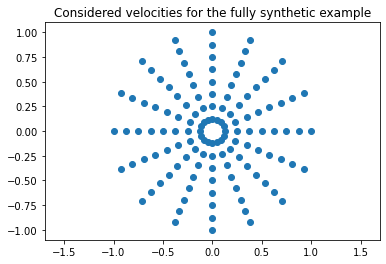

In [16]:
plt.title('Considered velocities for the fully synthetic example'); plt.axis('equal')
plt.scatter(*velocity);

The numerical scheme preserves the costs positivity, if the time step obeys the CFL condition and the instantaneous fuel costs are non-negative. 

In [17]:
C1 = Scheme(C_initial,dt,cost, dx=dx,velocity=velocity,four_point=four_point) #kwargs passed to Scheme0
print(f"Smallest and largest value after one step : {np.min(C1)}, {np.max(C1)}")
assert np.min(C1)>=0 and np.isfinite(np.max(C1))

Smallest and largest value after one step : 0.16471566, 7.024274


Precomputing the linear part of the scheme is a simple and efficient manner to improve computation speed.

In [18]:
scheme0 = MakeScheme0(C_initial,dx,velocity,four_point)
assert np.allclose(scheme0(C_initial),Scheme0(C_initial,dx,velocity,four_point),atol=3e-5,equal_nan=True)

In [19]:
%%timeit -n 20 
scheme0(C_initial)

109 µs ± 29.9 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [20]:
%%timeit -n 20 
Scheme0(C_initial,dx,velocity,four_point)

10.2 ms ± 532 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


For illustration, we compute the solution associated with the quadratic cost (with drift), constant in time and space.

In [21]:
%%time
C_solution = ad.array(list(accumulate(
    t_range[1:],
    initial=C_initial, 
    func=lambda C_t,t : Scheme(C_t,dt,cost,scheme0)
)))

Wall time: 51 ms


Accuracy is only first order. Also, the polygonal nature of the approximation is clearly visible.

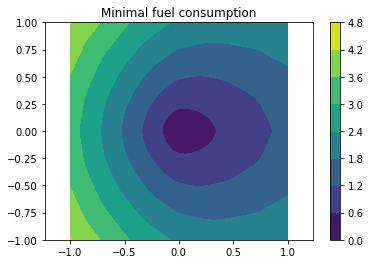

In [22]:
C_opt = np.min(C_solution,axis=0); 
plt.title("Minimal fuel consumption"); plt.axis('equal')
plt.contourf(*X,C_opt); plt.colorbar();

### 2.2 Computing the geodesic flow

Minimal paths are obtained by solving a time-dependent ODE, backwards from the final time to the initial time. As a first step, we must compute the optimal direction of the geodesics, which is obtained as the minimizer to the PDE of interest.

In [26]:
def BestVelocity(u,velocity,cost,scheme0=None,**kwargs):
    u0 = Scheme0(u,velocity=velocity,**kwargs) if scheme0 is None else scheme0(u)
    shape = u.shape # Domain shape
    u0 = u0 - fd.as_field(cost,shape)
    
    u0 = u0.reshape((-1,*shape)) # flatten radius-angular dimension
    u0[np.isnan(u0)] = -np.inf
    imax = np.argmax(u0,axis=0)

    velocity = fd.as_field(velocity,shape) # broadcast over domain
    velocity = velocity.reshape((2,-1,*shape)) # flatten radius-angular dimension

    return np.take_along_axis(velocity,imax.reshape((1,1)+imax.shape),axis=1).squeeze(axis=1) # Extract optimal

The best velocity, is radial, which is not unexpected : since our metric is constant in space and time the optimal geodesics are straight lines. Note however that the velocity takes discrete values, in contrast with the quadratic model studied in the previous notebook.

In [27]:
best_v = BestVelocity(C_solution[50],velocity,cost,scheme0)
plt.title("Optimal velocity"); plt.axis('equal')
quiver(*X,*best_v,subsampling=(4,4))

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,1,1,1) and requested shape (1,1,50,50)

Vehicles need to travel faster to reach points far from the origin. Note that the largest norm of a valid velocity is one in our model, and that velocity norms take discrete values.

In [ ]:
plt.title("Norm of the optimal velocity"); plt.axis('equal')
plt.contourf(norm(best_v,axis=0)); plt.colorbar();

 We observe here that the norms of the optimal velocity is a radial function. This may come as a surprise, since the fuel cost model is asymmetric. It is actually a property of the quadratic fuel cost, as discussed in the other notebooks.

### 2.3 Backtracking the optimal paths

The optimal paths obey a first order ODE, whose direction is given by the optimal velocity.

**Note on computation time.** Geodesic backtracking involves hundreds of times less computations than the solving the time dependent PDE. The computation time of geodesic backtracking is almost entirely attibutable to python overhead, and could be sped up by orders of magnitude easily using a C++ code.

In [ ]:
C_velocity = [BestVelocity(C,velocity,cost,scheme0) for C in C_solution]

We choose initial points for the optimal path (often referred to as geodesic) backtracking, here uniformly over the domain.

In [ ]:
s=5; s0,s1 = X.shape[1:]
y0 = X[:,s0//(2*s)::s1//s,s0//(2*s)::s1//s].reshape((2,-1)) # Subsampled s x s grid used as initial points

plt.title("Initial points for the geodesic backtracking"); plt.axis('equal')
plt.scatter(*y0);

We obtain *approximately* straight lines ending *approximately* at the origin. This behavior is expected since the cost $c(t,x,v)$ function is independent of time $t$ and space $x$ in this example, $c=c(v)$. Note that lines not ending at the origin are typically caused by either:
* Insufficient simulation time (diagnostic : the  minimal cost is attained for the final step)
* Insufficiently strong initial penalization.

In [ ]:
geodesics = odeint_array(C_velocity[::-1],y0,t_range[::-1],X)
plt.title("Minimal geodesics")
for geo in geodesics.T: plt.plot(*geo)

One may want to compute the geodesic not from the final time of the numerical simulation, but from the specific time. For instance, here, we select the time minimizing the travel cost. The results look similar to the above, because the metric is constant in time.

In [ ]:
best_step = np.argmin(interp(X,C_solution)(y0),axis=0) # Step of the simulation minimizing cost
t_delay = len(t_range) - best_step-1 # Account for reversed time
geodesics = odeint_array(C_velocity[::-1],y0,t_range[::-1],X, t_delay=t_delay)
for geo,delay in zip(geodesics.T,t_delay): plt.plot(*geo[:,delay:]) # Drop the first points according to delay

### 2.4 Optimization of memory usage

In practical applications, the number of time steps can be much larger than here, raising serious concerns about memory usage if the full time-dependent solution is stored. We illustrate here how to bypass this potential issue by storing selected keypoints of the solution.

**Note on memory usage in this specific example.**
In the numerical example chosen here, there are less than $n \leq 100$ time steps, hence the full solution holds $n$ values for each point $x$. For comparison, the sparse linear operator precomputed and saved here holds three coefficients, and three indices, thus $6$ values, for each point $x$ and each velocity $v$. Thus the memory cost of the sparse linear operator vastly exceeds the memory cost of the full time-dependent solution in this specific example

The memory optimization discussed here is therefore only relevant if it is applied to another model whose linear operator has a simpler structure, or whose number of time steps is much more important, or if it is completed by additional work on efficient representation of the sparse operator. In particular, it could be relevant to the notebook involving a [quadratic cost function](BoatRoutingTime.ipynb).

In [ ]:
print(f"Number of time steps : {len(t_range)}")
print(f"Number of velocities at each point : {len(velocity_norm)*len(velocity_angle)}")

A difficulty comes from the fact that the iterations need to be rolled back in order to backtrack the geodesics. For that purpose, a data structure is proposed that helds a selection of intermediate results (keypoints). We illustrate this mechanism here.

For $b^n$ iterations, $n b$ keypoints will be stored at most, where $b$ is the *basis* used in the keypoint storage mechanism. By default $b=10$. At rewind time, some values may be re-computed up to $n$ times.

In [ ]:
def advance(C): return Scheme(C,dt,cost,scheme0)
C_generator = RecurseRewind(advance,C_initial)

# The generator applies advance recursively to C_initial
for C_ref,C in zip(C_solution,C_generator):
    assert np.allclose(C,C_ref)

# But there are fewer of them
print(f"Number of keypoints: {len(C_generator._keys)}, and indices: {C_generator._keys.keys()}")

# Only a few keypoints are stored, with the solution a the corresponding time
for key,value in C_generator._keys.items():
    assert np.allclose(value,C_solution[key])

# Rewind the iterations. This includes some recomputations, from suitable keypoints
C_generator.reversed = True
for value1,value2 in zip(C_generator,reversed(C_solution)):
    assert np.allclose(value1,value2)

In order to limit memory usage, one can use the keypoint based rewind mechanism, as follows.

<!---
def BestStep(iterator, y0, n):
    """Get the best step at y0, by advancing n times the iterator"""
    ny0=y0.shape[1]
    C_min = np.full(ny0,np.inf)
    iC_min= np.full(ny0,0)

    for i,C in zip(range(n),iterator):
        C_y0 = interp(X,C)(y0)
        pos = C_y0 < C_min
        C_min[pos] = C_y0[pos]
        iC_min[pos] = i
    return iC_min
--->

In [ ]:
C_generator = RecurseRewind(advance,C_initial)
for t,C in zip(t_range,C_generator):
    # Do something with the PDE solution C at time t
    # Ex : compute the optimal step
    pass

C_generator.reversed=True
velocity_generator = (BestVelocity(C,velocity,cost,scheme0) for C in C_generator) 
geodesics = odeint_array( velocity_generator ,y0,t_range[::-1],X)
for geo in geodesics.T: plt.plot(*geo)

## 3. Data driven cost

In this section, we run the algorithm with a set of costs and velocities that are closer to a real use case.
The set of velocities, is chosen in accordance with a dataset provided by collaborators. In the local orthonormal frame these velocities read as follows.

In [ ]:
velocity_norm = [5,7,8,9,10,12,14,16,18] # Boat velocity in knots
velocity_nangle = 48 if large_instances else 24
velocity_angle = xp.linspace(0,2*np.pi,velocity_nangle,endpoint=False)
velocity = np.moveaxis(ad.array([ [(s*np.cos(θ),s*np.sin(θ)) for s in velocity_norm] for θ in velocity_angle]),-1,0)

### 3.1 Interpolation of the costs

We use some synthetic data samples. The costs are interpolated w.r.t. the meteorological conditions:
wind speed, wave period and height.

They correspond to a wind coming from the right, and are provided for a range of velocities and angles.
We do interpolate the costs w.r.t angle, but not velocity. The angular interpolation allows to use a fixed set of velocities, independent of the wind direction, thus greatly improves the numerical efficiency of the scheme.

<!---
conditions_all = {
    'True wind speed (kt)':[0, 5, 8, 10, 14, 18, 22, 26, 30, 35, 40],
    'Mean wave period (s)':[2, 4, 5.5, 7.5, 9, 10.5, 13, 16],
    'Significant wave height (m)':[0, 1.5, 3, 4.5, 6, 7.5, 10],
}
speed_entries = [5,7,8,9,10,12,14,16,18] # (knots ?) 
angle_entries = np.linspace(0,2*np.pi,25,endpoint=True)
--->

In [ ]:
def MakeCosts():
    """Returns the an interpolation function for the costs, associated with the given conditions"""
    
    # Load the cost data file. See https://stackoverflow.com/a/61716809/12508258
    try:
        with open('TestData/ModelePerformanceNavire.npy','rb') as f: 
            costs = np.load(f)
    except FileNotFoundError:
        import requests,io
        requests.get('https://dl.dropbox.com/s/f6941z6uycgogcd/ModelePerformanceNavire.npy')
        costs = np.load(io.BytesIO(response.content))  
            
    # Interpolation axes
    ax_boat_speed = [5,7,8,9,10,12,14,16,18] # Boat speed (knots ?) 
    ax_wind_angle = np.linspace(0,2*np.pi,25,endpoint=True) # Boat angle w.r.t wind
    ax_wind_speed = [0, 5, 8, 10, 14, 18, 22, 26, 30, 35, 40] # True wind speed (kt)
    ax_wave_period = [2, 4, 5.5, 7.5, 9, 10.5, 13, 16] # Mean wave period (s)
    ax_wave_height = [0, 1.5, 3, 4.5, 6, 7.5, 10] # Significant wave height (m)
    
    # Set angular variable in [0,2 pi] instead of [0,pi]
    costs = np.concatenate((costs, costs[:,-2::-1]),axis=1) 
    # Move boat_speed and wind_angle last, for convenience 
    costs = np.moveaxis(costs,(0,1),(-1,-2)) 

    # Interpolation on the CPU for now
    v_norm,v_angle = map(cupy_get,(velocity_norm,velocity_angle))
    costsI = RegularGridInterpolator((ax_wind_speed,ax_wave_period,ax_wave_height,ax_wind_angle), costs)
    assert np.allclose(v_norm,xp.array(ax_boat_speed)) # no interpolation needed on this axis
    
    def GetCosts(wind_angle,wind_speed,wave_period,wave_height):
        """Return the costs for all considered velocities of the boat, given the meteorological conditions"""
        # Add one dimension for sampling all the velocity angles
        wind_angle,wind_speed,wave_period,wave_height = (
            cupy_get(fd.as_field(e,shape=velocity_angle.shape,conditional=False)) 
            for e in (wind_angle,wind_speed,wave_period,wave_height))
        wind_rel_angle = (v_angle-wind_angle+np.pi) % (2*np.pi) 

        pt = np.array((wind_speed,wave_period,wave_height,wind_rel_angle)).T
        extracted_costs = np.moveaxis(costsI(pt),-1,1) # velocity_angle,velocity_norm,...
        return xp.asarray(extracted_costs)
    
    return GetCosts

In [ ]:
get_costs = MakeCosts()

In [ ]:
def show_displacement_cost(velocity,cost):
    """
    Polar plot of the distance reachable for unit fuel consumption,
    in all directions.
    """
    ratio = velocity/cost
    ratio = np.concatenate((ratio,ratio[:,:1]),axis=1)
    
    plt.title("Distance reached for unit fuel, at different boat speeds")
    plt.axis('equal')
    plt.plot(*ratio)
    plt.legend(norm(velocity[:,0],axis=0))
    plt.scatter(0,0)

### 3.2 Discussion of the fuel consumption

The following polar plot presents the reachable distance per unit fuel for a boat, depending on the boat speed, on a flat sea: the wind speed and wave height are set to zero. The following remarks are in order:
* The distance is independent of the boat direction, obviously, since there is no drag or drift due to the wind or waves.
* The maximal distance is not achieved for the minimal speed, or the maximal speed, but for something in between. This suggests that the boat fuel consumption at rest is not zero.

In [ ]:
show_displacement_cost(velocity,get_costs(0,0,4,0)) # wind speed and wave height are zero

In the next plot, we introduce wind, in the direction $(1,0)$, horizontal and directed to the right (or is it the left ?).
The reachable distance now depends on the direction. 
Interestingly, from the mathematical standpoint, the set delimited by this distance is non-convex, for some boat speeds.

This property will not be reflected by the PDE solution, whose level set are expected to yield the convex envelope.
More complex models, involving additional state variables with an adequate transition cost between states, are needed to properly reflect this behavior. See the introduction of this notebook.

In [ ]:
show_displacement_cost(velocity,get_costs(0,12,9,3)) 

In [ ]:
show_displacement_cost(velocity,get_costs(0,14,4,1.5)) 

Fuel cost for a rotated wind.

In [ ]:
cost = get_costs(np.pi/3,14,4,1.5)
show_displacement_cost(velocity,cost)

Some fuel costs are only partially known. As mentioned in the introduction, the HJB PDE implicitly uses the convex envelope of the 
known costs, since they are used through their Legendre-Fenchel transform.

In [ ]:
show_displacement_cost(velocity[:,:,:4],cost[:,:4])

### 3.3 Numerical solution

We consider constant weather conditions, and reproduce the above curves from the PDE solution. 

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
# Coordinate system
nX = 100 if large_instances else 50
aX,dx = xp.linspace(-1,1,nX,retstep=True)
X = ad.array(np.meshgrid(aX,aX,indexing='ij'))

four_point = False

# Wait until all domain is reached even at smallest speed
t_max = 1./np.min(velocity_norm)
dt = 0.5*CFL(velocity,dx,four_point)
t_range = np.arange(0,t_max,dt)

C_initial = 300 * norm(X,axis=0) 

scheme0 = MakeScheme0(C_initial,dx,velocity,four_point)

In the next cell, we compute the cost for all times $t \in [0,t_{\max}]$. We also extract the cost $C_s$ corresponding to a boat reaching position $x$ at time $t = s\| x\|$, where $s\in S$ belongs to the collection of speeds in our table.

In [ ]:
%%time
C_solution = ad.array(list(accumulate(
    t_range[1:],
    initial=C_initial,
    func=lambda C_t,t: Scheme(C_t,dt,cost,scheme0)
)))

In [ ]:
C_solution.shape

In [ ]:
normX = norm(X,axis=0)
C_cst_speed = []
for speed in velocity_norm:
    # Compute the time step corresponding to reaching a given point at constant speed
    i = np.round(normX/(speed*dt)).astype(int)
    i = np.minimum(i,len(C_solution)-1)
    
    # Extract the costs corresponding to a motion at constant speed
    C_s = np.take_along_axis(C_solution, np.expand_dims(i,axis=0),axis=0)
    C_cst_speed.append(np.squeeze(C_s,axis=0))  

The level lines $C_s = cst$ are expected to coincide, in the limit as the grid scale tends to zero, with the convex envelope boundary of the similar lines in the last figure of the previous section. Numerically we observe such behavior, approximately, although the convergence order is rather slow, and the bias induced by the coordinate axes takes a while to disappear.

**Note on the numerics.** The results do look a bit better if `large_instances` is `True`.

In [ ]:
plt.scatter(0,0); plt.axis('equal')
for speed,C_speed,color in zip(velocity_norm,C_cst_speed,colors):
    plt.contour(*X,C_speed,levels=[40],colors=[color])

In [ ]:
plt.figure(figsize=[12,5])
sl = slice(3,7)  # Selection of speeds to be shown

plt.subplot(1,2,1)
show_displacement_cost(velocity[:,:,sl],cost[:,sl])

plt.subplot(1,2,2)
plt.title('Likewise, numerical solution')
plt.scatter(0,0); plt.axis('equal')
for speed,C_speed,color in zip(velocity_norm[sl],C_cst_speed[sl],colors):
    plt.contour(*X,C_speed,levels=[40],colors=[color])

## 4. Complex environment

We consider two more complex test cases, to illustrate the generality of the proposed scheme. The first one involves a simplified model, quadratic and time-independent, for comparison with the other numerical approaches. The second one involves time-dependent and data-driven costs.

### 4.1 Validation on a quadratic and static test case

For comparison purposes, we reproduce a numerical example also considered in the notebooks on the [quadratic](BoatRouting_Time.ipynb) and [static](../Notebooks_FMM/BoatRouting.ipynb) variants of the problem. This example takes into account the earth spherical geometry, and uses quadratic and constant in time costs.

In [ ]:
def MakeDomain(n,K_initial=3):
    """Produces the [-2,2]x[-1,1] domain along with some initial condition"""
    # Setup the coordinate system
    aX0,dx = xp.linspace(-2,2,2*n,retstep=True)
    aX1 = xp.linspace(-1,1,n)
    X = ad.array(np.meshgrid(aX0,aX1,indexing='ij'))
    shape = X.shape[1:]

    # Set the initial condition
    seed = [-1.7,0.6]
    C_initial = K_initial * norm(X - fd.as_field(seed,shape),axis=0)
    
    # Set the obstacles
    walls = X[1]-np.abs(X[0])>=0
    C_initial[walls] = np.nan
    
    return X,dx,C_initial

In [ ]:
# Setup the coordinate system and initial condition
X,dx,C_initial = MakeDomain(100 if large_instances else 50)

# Select the set of test velocities
velocity_norm = xp.linspace(1.5,0,12,endpoint=False)
velocity_nangle = 32 if large_instances else 16
velocity_angle = xp.linspace(0,2*np.pi,velocity_nangle,endpoint=False)
velocity = np.moveaxis(ad.array([[ (r*np.cos(θ),r*np.sin(θ)) 
    for r in velocity_norm] for θ in velocity_angle]),-1,0) 

# Quadratic and static model, introduced in 
μ,ω,M = np.ones_like(C_initial),BoatRouting.Currents(*X),BoatRouting.IntrinsicMetric(BoatRouting.Spherical,*X)
μ,ω,M = tuple(e.reshape(e.shape[:-2]+(1,1)+e.shape[-2:]) for e in (μ,ω,M)) # Broadcast ...
v = velocity.reshape(velocity.shape+(1,1)) # Broadcast ...
cost = μ + 0.5* lp.dot_VAV(v-ω,M,v-ω)

# Time steps
t_max = 2.5
dt = 0.5*CFL(velocity,dx)
t_range = xp.arange(0,t_max,dt)

Build the numerical scheme.

In [ ]:
four_point = False
scheme0 = MakeScheme0(C_initial,dx,velocity,four_point)

In [ ]:
%%time
C_solution = ad.array(list(accumulate(
    t_range[1:],
    initial=C_initial,
    func=lambda C_t,t : Scheme(C_t,dt,cost,scheme0)
)))

We extract and display the optimal arrival time, and the corresponding minimal cost.
The results correspond, visually at least, to those displayed within the notebooks on the [quadratic](BoatRouting_Time.ipynb) and [static](../Notebooks_FMM/BoatRouting.ipynb) variants of the numerical scheme.

In [ ]:
C_opt = np.min(C_solution,axis=0)
t_opt = t_range[np.argmin(C_solution,axis=0)]

In [ ]:
plt.figure(figsize=[16,4])

plt.subplot(1,2,1); plt.axis('equal')
plt.title("Optimal arrival times computed by the generic time dependent scheme")
plt.contourf(*X,t_opt); plt.colorbar()

plt.subplot(1,2,2); plt.axis('equal')
plt.title("Optimal costs computed by the generic time dependent scheme")
plt.contourf(*X,C_opt); plt.colorbar();

Finally, we backtrack the geodesics from selected points. The trajectories are similar to those of the other notebooks, hopefully. Their polygonal nature is apparent, and due to the fact that we only consider finitely many distinct velocities.
(The result looks much better if `large_instances` is `True`.)

In [ ]:
y0 = np.meshgrid(clinspace(-2,2,6),clinspace(-1,1,3),indexing='ij')
y0 = xp.asarray(y0).reshape(2,-1)

# Find the optimal arrival time
best_step = np.argmin(interp(X,C_solution)(y0),axis=0) # Step of the simulation minimizing cost
t_delay = len(t_range) - best_step-1 # Account for reversed time

# Compute the optimal velocity, and extract the optimal paths
C_velocity = [BestVelocity(C,velocity,cost,scheme0) for C in C_solution]
geodesics = odeint_array(C_velocity[::-1],y0,t_range[::-1],X, t_delay=t_delay)

In [ ]:
plt.title("Optimal paths, for the optimal arrival time"); 
plt.axis('equal'); plt.contourf(*X,np.isnan(C_initial),cmap='Greys') # Show the walls
for geo,delay in zip(geodesics.T,t_delay): plt.plot(*geo[:,delay:]) # Drop the first points according to delay

### 4.2 Time dependent, data driven cost

We modify the model to feature a data driven cost, with a strong opposite wind in the middle at some point in time.

We still want to take into account the geometry of the earth, but would like to avoid interpolating the cost data. For that purpose, we rescale the horizontal velocity component, according to the cosine of the latitude.

In [ ]:
n=60 if large_instances else 30
X,dx,C_initial = MakeDomain(n,K_initial=300)

In [ ]:
velocity_norm = [5,7,8,9,10,12,14,16,18] # Boat velocity in knots
velocity_nangle = 48 if large_instances else 24
velocity_angle = xp.linspace(0,2*np.pi,velocity_nangle,endpoint=False)
velocity_flat = np.moveaxis(ad.array([ [(s*np.cos(θ),s*np.sin(θ)) for s in velocity_norm] for θ in velocity_angle]),-1,0)

velocity = ad.array(fd.as_field(velocity_flat,X[0].shape))
velocity[0] /= np.cos(X[1]) 

In [ ]:
dt = 0.5*CFL(velocity,dx,four_point)
t_max = 0.5
t_range = xp.arange(0,t_max,dt)

Let us choose some wind and wave orientation and strength. With the current implementation, the cost extraction and interpolation, from the tabulated data, is a bottleneck. (In particular it is not GPU accelerated.) For simplicity, we shift over time a wind map, that is computed once and for all.

In [ ]:
def MakeMeteo(x,wind_coef=1.,retwind=False):
    shape = x.shape[1:]
    x0 = [0.,-1.5] # New origin. Wind turns around this center 
    x = x - fd.as_field(x0,shape)
    r = norm(x,axis=0)
    v = np.exp(-0.5*r**2) * ad.array([-x[1],x[0]])    
    v0 = [2.,-1] # Some time independent wind
    wind =  wind_coef*(30*v + 3*fd.as_field(v0,shape))
    
    if retwind: return wind
    wind_angle = np.arctan2(wind[1],wind[0])
    wind_speed = norm(wind,axis=0)
    
    wave_period = fd.as_field(9.,shape)  # (Not very inspired here)
    wave_height = wind_speed/4. + 2.
    return wind_angle,wind_speed,wave_period,wave_height

In [ ]:
plt.title("Wind map, adverse conditions (pushing the boat right to left).")
quiver(*X,*MakeMeteo(X,retwind=True),subsampling=(4,4))

Meteo is defined over a slightly larger domain, shifted over time.

In [ ]:
Xmeteo = ad.array(np.meshgrid(xp.linspace(-3,3,3*n),X[1,0,:],indexing='ij'))
cost_ = get_costs(*MakeMeteo(Xmeteo.reshape((2,-1))))
cost_ = cost_.reshape(cost_.shape[:-1]+Xmeteo.shape[1:])
def cost(t,cost_):
    # Input cost_ is shifted left to right from t=0 to t=t_max
    i = int(np.floor(n*t/t_max)) 
    i = n-i-1
    return cost_[:,:,i:(2*n+i),:] 

In [ ]:
four_point = False
scheme0 = MakeScheme0(C_initial,dx,velocity,four_point)

In [ ]:
%%time
C_solution = ad.array(list(accumulate(
    t_range[1:],initial=C_initial,
    func = lambda C,t: Scheme(C,dt,cost(t,cost_),scheme0)
)))

We compare the minimal paths leading to the same point at different times.

In [ ]:
t_delay = np.array([(len(t_range)*i)//10 for i in range(10)])
y0 = fd.as_field([1.8,-0.4], t_delay.shape)

In [ ]:
# Compute the optimal velocity, and extract the optimal paths
C_velocity = [BestVelocity(C,velocity,cost(t,cost_),scheme0) for t,C in zip(t_range,C_solution)]

In [ ]:
geodesics = odeint_array(C_velocity[::-1],y0,t_range[::-1],X, t_delay=t_delay)

The next figure clearly illustrates that the optimal path to reach a given point depends on the desired arrival time, if the model is time-dependent.
Note that the boat journey starts on the left, and ends in the right. The following interpretation seems to match the observations:
* If the arrival time $t \in \{0.05, 0.1, 0.15\}$, then the *minimal path backatracking fails*, and the extracted path ends in the middle of the domain rather than at the seed point. 
* If the arrival time $t\in \{0.2,0.25,0.3\}$, then the extracted path is almost always the same, and coincides with the path extracted in the absence of wind, which is the shortest path for the earth geometry in the navigable area. Note that the shortest path is not a straight line since we take into account the earth curvature.
* If the arrival time $t \in \{0.35,...,0.5\}$, then the optimal path takes the time to avoid the adverse weather conditions by staying in the north as long as possible.

In [ ]:
plt.axis('equal'); plt.contourf(*X,np.isnan(C_initial),cmap='Greys')
plt.title("Optimal path with adverse winds, for several arrival times")
for i,(geo,delay) in enumerate(zip(geodesics.T,t_delay)):
    plt.plot(*geo[:,delay:]) # Drop the first points according to delay
plt.scatter(*geodesics[-1,:,0],color='red') # seed point (start of path)
plt.scatter(*y0[:,0],color='blue') # tip point (end of path)
plt.legend(np.round(cupy_get(t_range[-t_delay-1]),decimals=2));

The longest time, the lowest fuel cost, in this example, because this gives the boat the opportunity to avoid the adverse winds.
Note that the latest three can be discarded, as the vehicle does not have the possibility to reach the target in so short time.

In [ ]:
print("Fuel cost for extracted path : ", np.round(interp(X,C_solution)(y0[:,0])[-t_delay-1],decimals=1))
print("Arrival time : ",np.round(t_range[-t_delay-1],decimals=2))

For comparison, we repeat the experiment with no wind, and with favorable winds (instead of adverse).

In [ ]:
def OptimalVelocity(wind_coef):
    # Produce the wind dependent 
    cost_ = get_costs(*MakeMeteo(Xmeteo.reshape((2,-1)),wind_coef))
    cost_ = cost_.reshape(cost_.shape[:-1]+Xmeteo.shape[1:])
    
    C_solution = ad.array(list(accumulate(
    t_range[1:],initial=C_initial,
    func = lambda C,t: Scheme(C,dt,cost(t,cost_),scheme0)
    )))
    
    C_velocity = [BestVelocity(C,velocity,cost(t,cost_),scheme0) for t,C in zip(t_range,C_solution)]
    return C_solution,C_velocity

Without any wind, as announced above, all the paths follow the same route from seed to tip, independently of the arrival time, which is simply the path of minimal length for the earth geometry and within the navigable area. This is with the exception excessively early arrival times $t\leq 0.15$ for which no admissible path exists with the admissible boat velocities. 

In [ ]:
C_solution_0,C_velocity_0 = OptimalVelocity(0.) # No wind

In [ ]:
geodesics = odeint_array(C_velocity_0[::-1],y0,t_range[::-1],X, t_delay=t_delay)
    
plt.title("Optimal path without wind, for several arrival times")
plt.axis('equal'); plt.contourf(*X,np.isnan(C_initial),cmap='Greys')
for i,(geo,delay) in enumerate(zip(geodesics.T,t_delay)):
    plt.plot(*geo[:,delay:]) # Drop the first points according to delay
plt.scatter(*geodesics[-1,:,0],color='red') # seed point (start of path)
plt.scatter(*y0[:,0],color='blue') # tip point (end of path)
plt.legend(np.round(cupy_get(t_range[-t_delay-1]),decimals=2));

In [ ]:
print("Fuel cost for extracted path : ", np.round(interp(X,C_solution_0)(y0[:,0])[-t_delay-1],decimals=1))

With "favorable" winds, mostly left to right, the optimal paths are again changed.

In [ ]:
C_solution_1, C_velocity_1 = OptimalVelocity(-1) # Favorable wind

In [ ]:
geodesics = odeint_array(C_velocity_1[::-1],y0,t_range[::-1],X, t_delay=t_delay)

plt.title("Optimal path with favourable winds, for several arrival times")
plt.axis('equal'); plt.contourf(*X,np.isnan(C_initial),cmap='Greys')
for i,(geo,delay) in enumerate(zip(geodesics.T,t_delay)):
    plt.plot(*geo[:,delay:]) # Drop the first points according to delay
plt.scatter(*geodesics[-1,:,0],color='red') # seed point (start of path)
plt.scatter(*y0[:,0],color='blue') # tip point (end of path)
plt.legend(np.round(cupy_get(t_range[-t_delay-1]),decimals=2));

Some observation on the fuel costs:
* The fuel costs for the adverse conditions (wind mostly right to left) are the highest.
* The fuel costs in the absense of wind are the lowest. Indeed, the "favourable" conditions are not so much favourable : wind often goes left to right, but also often north or south, when it does not help, see the quiver plot below. This also explains why the trajectories do not go to the extreme south in that case.
* The smallest cost, for some given wind conditions, is neither the earliest not the latest. This is because the boat fuel consumption at rest is significant, and because it also costs a lot to use full engine power to reduce travel time, see the discussion on the fuel consumption in section 3.2.

In [ ]:
t_del = t_delay[:-3] # Remove the non-feasible arrival times
for condition,C_sol in zip(("adverse","no wind", "favourable"),(C_solution,C_solution_0,C_solution_1)):
    print(f"Fuel cost in {condition} conditions : {np.round(interp(X,C_sol)(y0[:,0])[-t_del-1],decimals=1)}")
print("Arrival time : ",np.round(t_range[-t_del-1],decimals=2))

In [ ]:
plt.title("Wind map, favourable conditions (pushing the boat left to right).")
quiver(*X,*MakeMeteo(X,-1,retwind=True),subsampling=(4,4))